In [210]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l



In [211]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += (torch.normal(0, 0.01, y.shape))
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

In [212]:
features.numpy()

array([[-2.046604  , -1.3370261 ],
       [-0.75110257,  0.95967   ],
       [-0.06163772, -1.2690091 ],
       ...,
       [ 0.11390455, -1.1107793 ],
       [-1.7539266 , -2.1853347 ],
       [-0.06110853,  0.98165834]], dtype=float32)

In [213]:
labels.numpy()

array([[ 4.63530779e+00],
       [-5.92512786e-01],
       [ 8.38058567e+00],
       [ 1.15136070e+01],
       [ 1.67827094e+00],
       [ 1.41171563e+00],
       [ 2.71472067e-01],
       [ 1.40537846e+00],
       [-3.20949495e-01],
       [ 4.57833672e+00],
       [ 3.54208231e+00],
       [ 6.30628729e+00],
       [ 7.03281736e+00],
       [ 9.30115414e+00],
       [ 3.00008416e+00],
       [ 7.54690170e+00],
       [-2.81957150e-01],
       [ 8.46954727e+00],
       [ 3.76746249e+00],
       [ 5.04915380e+00],
       [ 6.53712034e+00],
       [ 6.63000154e+00],
       [ 5.18695211e+00],
       [ 1.12116985e+01],
       [ 1.20017970e+00],
       [ 5.38181210e+00],
       [ 8.31064034e+00],
       [ 4.89374065e+00],
       [ 3.32490993e+00],
       [-1.87455261e+00],
       [ 7.65843511e-01],
       [ 7.31211901e+00],
       [-1.37847573e-01],
       [ 1.32451115e+01],
       [ 5.95593882e+00],
       [ 2.73766088e+00],
       [ 1.52135289e+00],
       [ 6.27682829e+00],
       [ 9.9

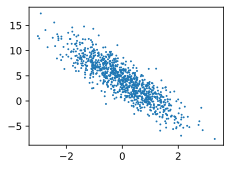

In [214]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [215]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]


In [216]:
for X, y in data_iter(batch_size=10, features=features, labels=labels):
    print(X)
    print(y)
    break

tensor([[-0.0166,  1.0109],
        [-1.8273,  0.2224],
        [-1.6616,  1.5611],
        [ 0.7482,  1.1733],
        [ 0.0362, -0.3152],
        [ 0.9773, -1.0803],
        [-0.8438, -0.5905],
        [-0.2782, -1.0763],
        [-0.0431, -1.0865],
        [-1.2700,  1.1685]])
tensor([[ 0.7252],
        [-0.2155],
        [-4.4182],
        [ 1.7197],
        [ 5.3364],
        [ 9.8333],
        [ 4.5210],
        [ 7.2962],
        [ 7.8167],
        [-2.2910]])


In [217]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print( f"w的误差估计：{true_w-w.reshape(true_w.shape)}")
print( f"b的误差估计：{true_b-b}")

w的误差估计：tensor([ 2.0061, -3.4004], grad_fn=<SubBackward0>)
b的误差估计：tensor([4.2000], grad_fn=<RsubBackward1>)


In [218]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [219]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [220]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= (lr * param.grad / batch_size)
            param.grad.zero_()
        

In [221]:
lr=0.03
num_epochs=30
net=linreg
loss=squared_loss
batch_size=10
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)  
        print(f'epoch {epoch+1},loss {float(train_l.mean().detach()):f}')

epoch 1,loss 0.043189
epoch 2,loss 0.000166
epoch 3,loss 0.000051
epoch 4,loss 0.000051
epoch 5,loss 0.000051
epoch 6,loss 0.000051
epoch 7,loss 0.000051
epoch 8,loss 0.000051
epoch 9,loss 0.000051
epoch 10,loss 0.000051
epoch 11,loss 0.000051
epoch 12,loss 0.000051
epoch 13,loss 0.000051
epoch 14,loss 0.000051
epoch 15,loss 0.000051
epoch 16,loss 0.000051
epoch 17,loss 0.000051
epoch 18,loss 0.000051
epoch 19,loss 0.000051
epoch 20,loss 0.000051
epoch 21,loss 0.000051
epoch 22,loss 0.000051
epoch 23,loss 0.000051
epoch 24,loss 0.000051
epoch 25,loss 0.000051
epoch 26,loss 0.000051
epoch 27,loss 0.000051
epoch 28,loss 0.000051
epoch 29,loss 0.000051
epoch 30,loss 0.000051


In [222]:
print( f"w的误差估计：{true_w-w.reshape(true_w.shape)}")
print( f"b的误差估计：{true_b-b}")

w的误差估计：tensor([-3.8862e-05, -2.0838e-04], grad_fn=<SubBackward0>)
b的误差估计：tensor([0.0004], grad_fn=<RsubBackward1>)
